## 去哪儿网旅游景点分析
- 数据集: ./data/去哪网景点数据.csv
- 数据介绍: 该数据集是去哪儿网中全国32个省市自治区的13617个景点信息，包括景点名称、地区、评分、评级、地址、评语、价格、销量、省市自治区9个字段，可用于分析全国景点分布以及相关景点信息。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import jieba
from wordcloud import WordCloud
from PIL import Image
plt.rcParams['font.sans-serif'] = 'STKaiti'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
data = pd.read_csv('./data/去哪儿网景点数据.csv', engine='python', encoding='gbk')
data.head()


,序号,景点名称,地区,评分,评级,地址,评语,价格,销量,省市自治区
0,1,八达岭长城,北京·北京·延庆县,0.82,5A景区,北京市延庆县军都山关沟古道北口216省道附近,不到长城非好汉,40.0,16382,北京市
1,2,圆明园,北京·北京·海淀区,0.76,4A景区,北京市海淀区清华西路28号,追忆昔日万园之园,46.0,6967,北京市
2,3,颐和园,北京·北京·海淀区,0.82,5A景区,北京市海淀区新建宫门路19号,保存完整的一座皇家行宫御苑,39.8,10820,北京市
3,4,恭王府,北京·北京·西城区,0.74,5A景区,北京市西城区什刹海前海西街17号,一起去看看和珅家,40.0,5182,北京市
4,5,天坛公园,北京·北京·东城区,0.80,5A景区,北京市东城区天坛内东里7号,探寻古代皇帝祭天仪式的奥秘,20.0,4296,北京市


In [3]:
# 查看数据类型
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13617 entries, 0 to 13616
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   序号      13617 non-null  int64  
 1   景点名称    13617 non-null  object 
 2   地区      13617 non-null  object 
 3   评分      13617 non-null  float64
 4   评级      13617 non-null  object 
 5   地址      13617 non-null  object 
 6   评语      13617 non-null  object 
 7   价格      13617 non-null  float64
 8   销量      13617 non-null  int64  
 9   省市自治区   13617 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1.0+ MB


In [4]:
# 查看每个省份的景点数量
data.groupby('省市自治区')['序号'].count().sort_values(ascending=False)

省市自治区
安徽省         445
河北省         445
山西省         444
北京市         443
福建省         443
广东省         443
浙江省         442
广西壮族自治区     441
辽宁省         440
贵州省         440
天津市         440
重庆市         439
湖北省         439
黑龙江省        438
云南省         438
四川省         438
江苏省         437
山东省         436
吉林省         436
新疆维吾尔自治区    435
江西省         434
台湾省         434
湖南省         433
海南省         432
上海市         432
河南省         430
内蒙古自治区      430
甘肃省         427
陕西省         427
西藏自治区       359
青海省         302
宁夏回族自治区     275
Name: 序号, dtype: int64

- 除了西部的三个省份（西藏自治区、青海省、宁夏回族自治区），其余省份的旅游景点数都在400个以上

In [5]:
# 每个评级的景区数量
data.groupby('评级')['序号'].count().sort_values(ascending=False)

评级
\N      10723
4A景区     1708
3A景区      839
5A景区      347
Name: 序号, dtype: int64

- 可以看到，无评级的景区数量最多达到1万以上，4A景区的景区数量为1708个，5A景区的景区数量最少，为347个

In [6]:
data['省市自治区'].nunique()

32

### 全国销量前15的景点

<AxesSubplot:xlabel='景点名称'>

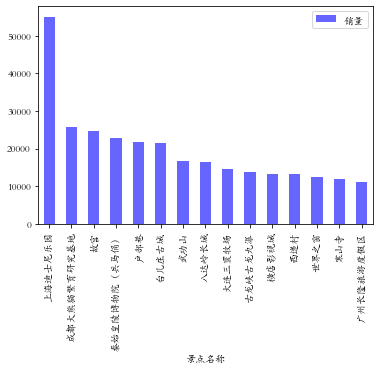

In [7]:
data.sort_values(by='销量', ascending=False).head(15).plot(x='景点名称', y='销量', kind='bar', color='blue', alpha=0.6)

- 可以看到，上海迪士尼乐园景区的销量最高，且远远高于第二名，近似于第二名的两倍。

### 全国销量前100的景点

In [12]:
data_sale_100 = data.sort_values(by='销量', ascending=False).head(100).reset_index()

<AxesSubplot:xlabel='省市自治区'>

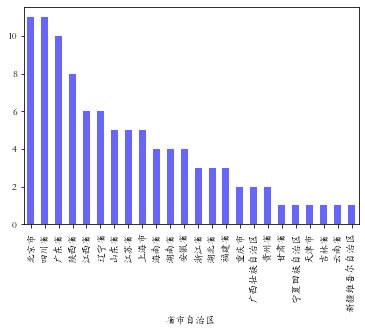

In [14]:
data_sale_100.groupby(by='省市自治区')['序号'].count().sort_values(ascending=False).plot(kind='bar', color='blue', alpha=0.6)

- 可以看到北京、四川、广东、山西的景点中销量在前一百的景点最多。

### 最受欢迎的省份

<AxesSubplot:title={'center':'各省市自治区景区销量排名'}, xlabel='省市自治区', ylabel='销量'>

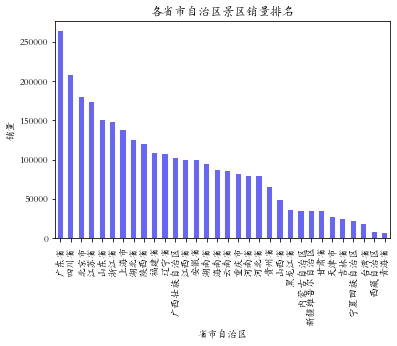

In [16]:
data.groupby(by='省市自治区')['销量'].sum().sort_values(ascending=False).plot(kind='bar', color='blue', alpha=0.6, title='各省市自治区景区销量排名', ylabel='销量')

- 分析各个省份景区门票销量情况，广东省的门票销量最高，在250000张以上，四川次之，然后是北京市、江苏省、山东省等等，销量最少的两个省市自治区是西藏自治区和青海省。

### 评分最高的500个景点

In [19]:
data_score_100 = data.sort_values(by='评分', ascending=False).head(500)

<AxesSubplot:title={'center':'各省市自治区评分前500景区数量'}, xlabel='省市自治区', ylabel='景区数量'>

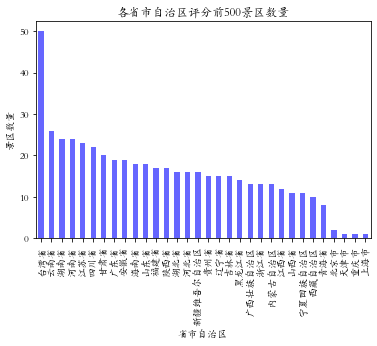

In [21]:
data_score_100.groupby(by='省市自治区')['序号'].count().sort_values(ascending=False).plot(kind='bar', color='blue', alpha=0.6, title='各省市自治区评分前500景区数量', ylabel='景区数量')

- 可以看出各省市自治区评分最高的500个景点里，属于台湾的最多，接近50个，其次是云南、湖南、河南、四川等省市自治区，数量大致处在20-25个左右，评分前500景点数量最少的四个省市自治区是四个直辖市（北京市、天津市、重庆市、北京市）。

### 各省市自治区门票平均价格

<AxesSubplot:title={'center':'各省市自治区门票平均价格'}, xlabel='省市自治区', ylabel='平均价格'>

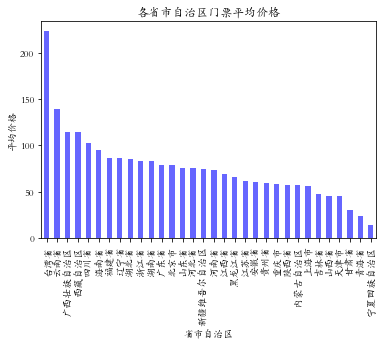

In [22]:
data.groupby(by='省市自治区')['价格'].mean().sort_values(ascending=False).plot(kind='bar', color='blue', alpha=0.6, title='各省市自治区门票平均价格', ylabel='平均价格')

- 台湾省景区门票平均价格明显高于其他省市自治区，平均价格超过200元，其他省市自治区景区平均价格低于150元，其中云南、广西、西藏、四川的门票平均价格在100-150元，其余省份在100元以下。

### 不同级别的景区门票平均价格

<AxesSubplot:title={'center':'不同级别的景区门票平均价格'}, xlabel='评级', ylabel='门票平均价格'>

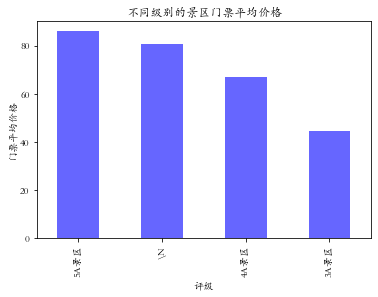

In [23]:
data.groupby('评级')['价格'].mean().sort_values(ascending=False).plot(kind='bar', color='blue', alpha=0.6, title='不同级别的景区门票平均价格', ylabel='门票平均价格')

- 5A景区的平均门票价格最高，在80元以上，没有评级的景区门票价格次之，3A级景区的门票平均价格最低。

### 不同级别的景区平均得分

<AxesSubplot:title={'center':'不同级别的景区平均得分'}, xlabel='评级', ylabel='景区平均得分'>

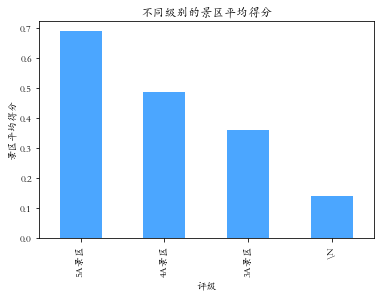

In [24]:
data.groupby('评级')['评分'].mean().sort_values(ascending=False).plot(kind='bar', color='dodgerblue', alpha=0.8, title='不同级别的景区平均得分', ylabel='景区平均得分')

- 5A景区的平均评分最高，在0.6以上，接近0.7，而其他级别的景区平均评分都在0.5以下。

### 景区评论词云图

In [27]:
# 北京
bj_list = data[data['省市自治区'] == '北京市']['评语'].tolist()

In [40]:
bj_comment = ''.join(bj_list)
bj_word_list = jieba.cut(bj_comment)
bj_space_word = ' '.join(bj_word_list)

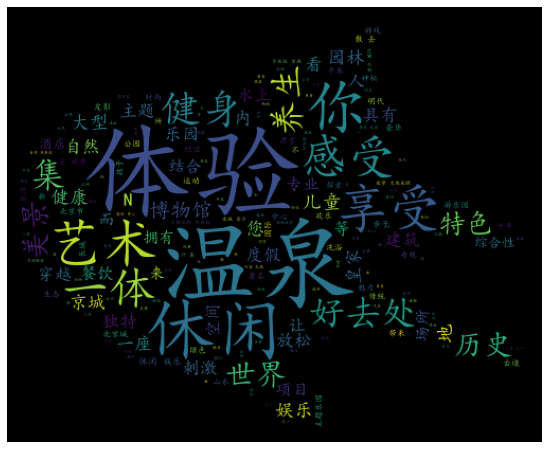

In [41]:
font = 'C:/Windows/Fonts/simkai.ttf'
background = Image.open('C:/Users/Shinelon/Pictures/Saved Pictures/cat.png')
graph = np.array(background)
word_cloud = WordCloud(
    font_path=font,
    mask=graph,
    stopwords={'北京', '的','位于','是','和','有','与','在','了',
                '一个','公里','文化', '上','以','约','大','于',
                '中国','这里','处','为','它','之','年','中','景区'}
)
word_cloud.generate(bj_space_word)
plt.subplots(figsize=(12,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()